# Market Risk Metrics: VaR and CVaR

This notebook focuses on the measurement of market risk using widely accepted quantitative risk metrics.
The objective is to estimate potential losses under normal market conditions and evaluate tail risk.

The analysis builds upon the exploratory analysis performed previously and applies risk metrics
commonly used in banks, asset managers, and consulting engagements.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm

In [2]:
tickers=['AAPL','MSFT','GOOGL','SPY']
prices=yf.download(tickers,start='2018-01-01',end='2025-01-01',auto_adjust=True,progress=False)['Close']
prices=prices.dropna()
prices.head()

Ticker,AAPL,GOOGL,MSFT,SPY
Date,,,,
2018-01-02,40.341892,53.258095,79.050392,237.208221
2018-01-03,40.334866,54.166737,79.418289,238.708649
2018-01-04,40.522217,54.377140,80.117249,239.714691
2018-01-05,40.983570,55.098190,81.110565,241.312225
2018-01-08,40.831345,55.292721,81.193314,241.753433


In [3]:
log_returns=np.log(prices/prices.shift(1)).dropna()
log_returns.head()

Ticker,AAPL,GOOGL,MSFT,SPY
Date,,,,
2018-01-03,-0.000174,0.016917,0.004643,0.006305
2018-01-04,0.004634,0.003877,0.008762,0.004206
2018-01-05,0.011321,0.013173,0.012322,0.006642
2018-01-08,-0.003721,0.003524,0.001020,0.001827
2018-01-09,-0.000114,-0.001275,-0.000680,0.002261


In [5]:
mean_returns=log_returns.mean()
volatility=log_returns.std()
risk_summary=pd.DataFrame({'Mean Return':mean_returns,'Volatility':volatility})
risk_summary

,Mean Return,Volatility
Ticker,,
AAPL,0.001035,0.019246
GOOGL,0.000718,0.019410
MSFT,0.000947,0.018207
SPY,0.000507,0.012306


In [8]:
confidence_level=0.05
var_historical=log_returns.quantile(1-confidence_level)
var_historical

Ticker
AAPL     0.028833
GOOGL    0.029283
MSFT     0.027231
SPY      0.016414
Name: 0.95, dtype: float64

In [10]:
z_score=norm.ppf(1-confidence_level)
var_parametric=mean_returns+z_score*volatility
var_parametric

Ticker
AAPL     0.032692
GOOGL    0.032644
MSFT     0.030894
SPY      0.020749
dtype: float64

In [13]:
cvar={}
for asset in log_returns.columns:
    losses=log_returns[asset][log_returns[asset]<=var_historical[asset]]
    cvar[asset]=losses.mean()
cvar=pd.Series(cvar)
cvar

AAPL    -0.001221
GOOGL   -0.001590
MSFT    -0.001156
SPY     -0.000843
dtype: float64

In [14]:
risk_metrics = pd.DataFrame({
    "VaR Historical": var_historical,
    "VaR Parametric": var_parametric,
    "CVaR": cvar
})

risk_metrics


,VaR Historical,VaR Parametric,CVaR
AAPL,0.028833,0.032692,-0.001221
GOOGL,0.029283,0.032644,-0.001590
MSFT,0.027231,0.030894,-0.001156
SPY,0.016414,0.020749,-0.000843


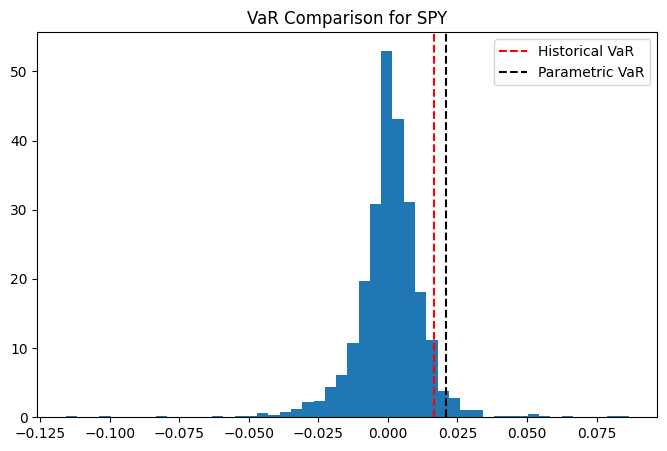

In [15]:
asset = "SPY"

plt.figure(figsize=(8, 5))
plt.hist(log_returns[asset], bins=50, density=True)
plt.axvline(var_historical[asset], color="red", linestyle="--", label="Historical VaR")
plt.axvline(var_parametric[asset], color="black", linestyle="--", label="Parametric VaR")
plt.title(f"VaR Comparison for {asset}")
plt.legend()
plt.show()


## Interpretation of Results

- Historical VaR captures empirical tail behavior but depends heavily on past data.
- Parametric VaR assumes normality and may underestimate extreme losses.
- CVaR provides additional insight by measuring the expected loss beyond the VaR threshold.
- Differences between metrics highlight the importance of model selection in risk management.


## Conclusion

This notebook demonstrates the application of standard market risk metrics used in professional
risk management environments.

The results illustrate how different modeling assumptions impact risk estimates and emphasize
the importance of complementing VaR with tail-risk measures such as CVaR.
